## STEPS FOR INSTALLING *fastai v2*.
\[DID NOT WORK\] Installation command from [docs.fast.ai](https://docs.fast.ai/)
```
conda install -c fastai -c pytorch -c anaconda fastai gh anaconda
```

\[DID NOT WORK - numpy installed through this has issues\] Installation command from [this article](https://medium.com/@pierre_guillou/how-to-install-fastai-v1-on-windows-10-ca1bc370dce4)
```
conda install fastai pytorch -c fastai -c pytorch -c conda-forge
```

### \[WORKING\] Install pytorch via conda and fastai via pip; Install ipywidgets also
```
conda install pytorch torchvision cudatoolkit=10.1 -c pytorch
pip install fastai
conda install -c conda-forge ipywidgets
conda install -c anaconda ipykernel
python -m ipykernel install --user --name=env_fastai_v2
```

In [1]:
import fastai
print('fastai : version {}'.format(fastai.__version__))

fastai : version 2.0.16


In [2]:
from fastai.vision.all import *
import re

In [3]:
path = Path("../inputs_outputs/datasets_train_test/vjump_dataset")
path.ls()

(#3) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/test'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test_real_unseen'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train')]

In [4]:
(path/"test").ls()

(#4) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/landing'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/squat'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/transition')]

In [5]:
get_image_files(path/"test")

(#198) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/20200918_161843_FRAME_70_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/20200918_161843_FRAME_74_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_1260_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_1354_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_253_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_335_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_36_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_429_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test/jump_peak/IMG_3510_FRAME_646_jump_peak.png'),Path('.

In [6]:
verify_images(get_image_files(path/"test"))

(#0) []

In [7]:
# Run this to remove any files in the dataset that fail verification (ie. they're not images).

# failed = verify_images(get_image_files(path/"train"))
# failed.map((path/"train").unlink)

In [8]:
model_pkl_path = "C:/Users/S121741/Documents/Personal/Personal Projects_DATA/1. Fitness AI/w_yrs_poc1/inputs_outputs/models/resnet34__v3.0.pkl"
learn_inf = load_learner(model_pkl_path)

In [9]:
learn_inf.dls.vocab

['jump_peak', 'landing', 'squat', 'transition']

In [10]:
learn_inf.predict(get_image_files(path/"test")[0])

('jump_peak',
 tensor(0),
 tensor([9.9669e-01, 2.9622e-03, 1.0313e-04, 2.4267e-04]))

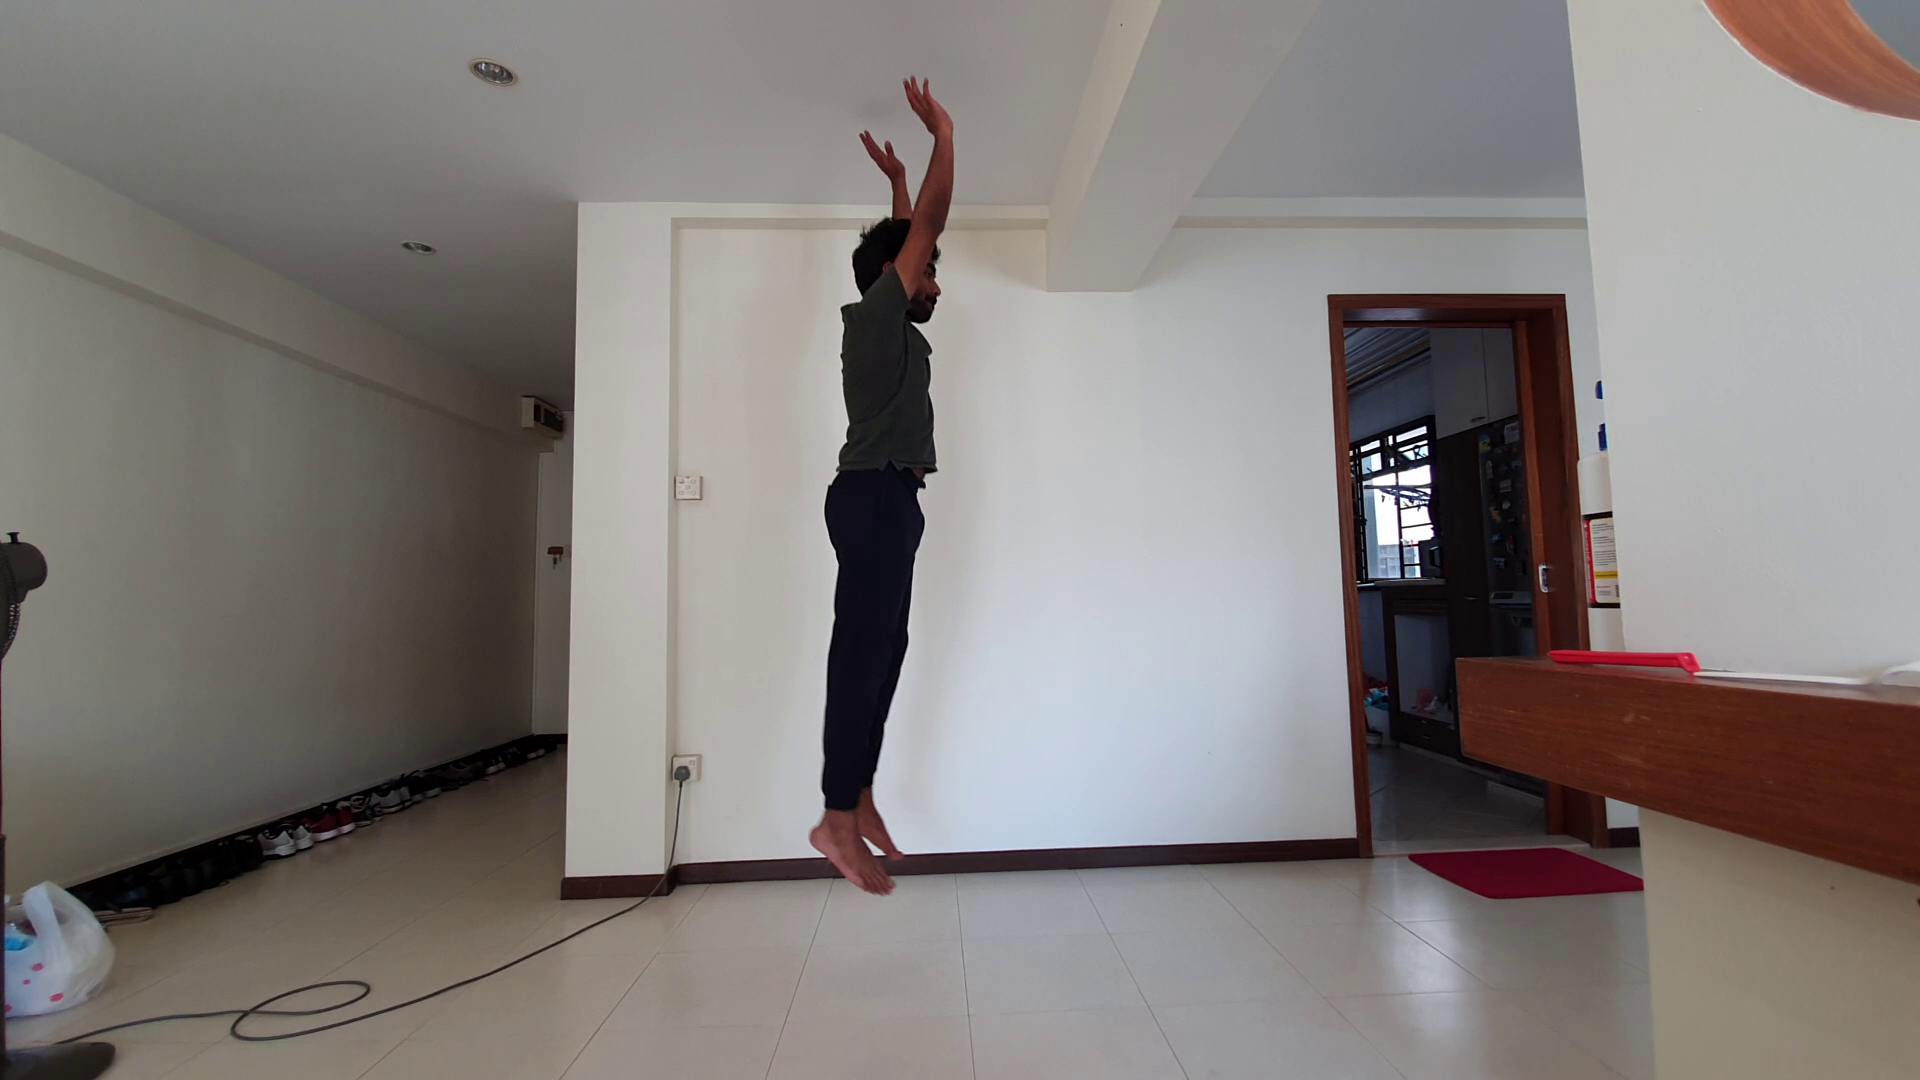

In [11]:
im = load_image(get_image_files(path/"test")[0])
im

In [12]:
learn_inf.predict(get_image_files(path/"test")[-1])

('transition',
 tensor(3),
 tensor([6.3127e-04, 8.5820e-03, 1.9142e-02, 9.7164e-01]))

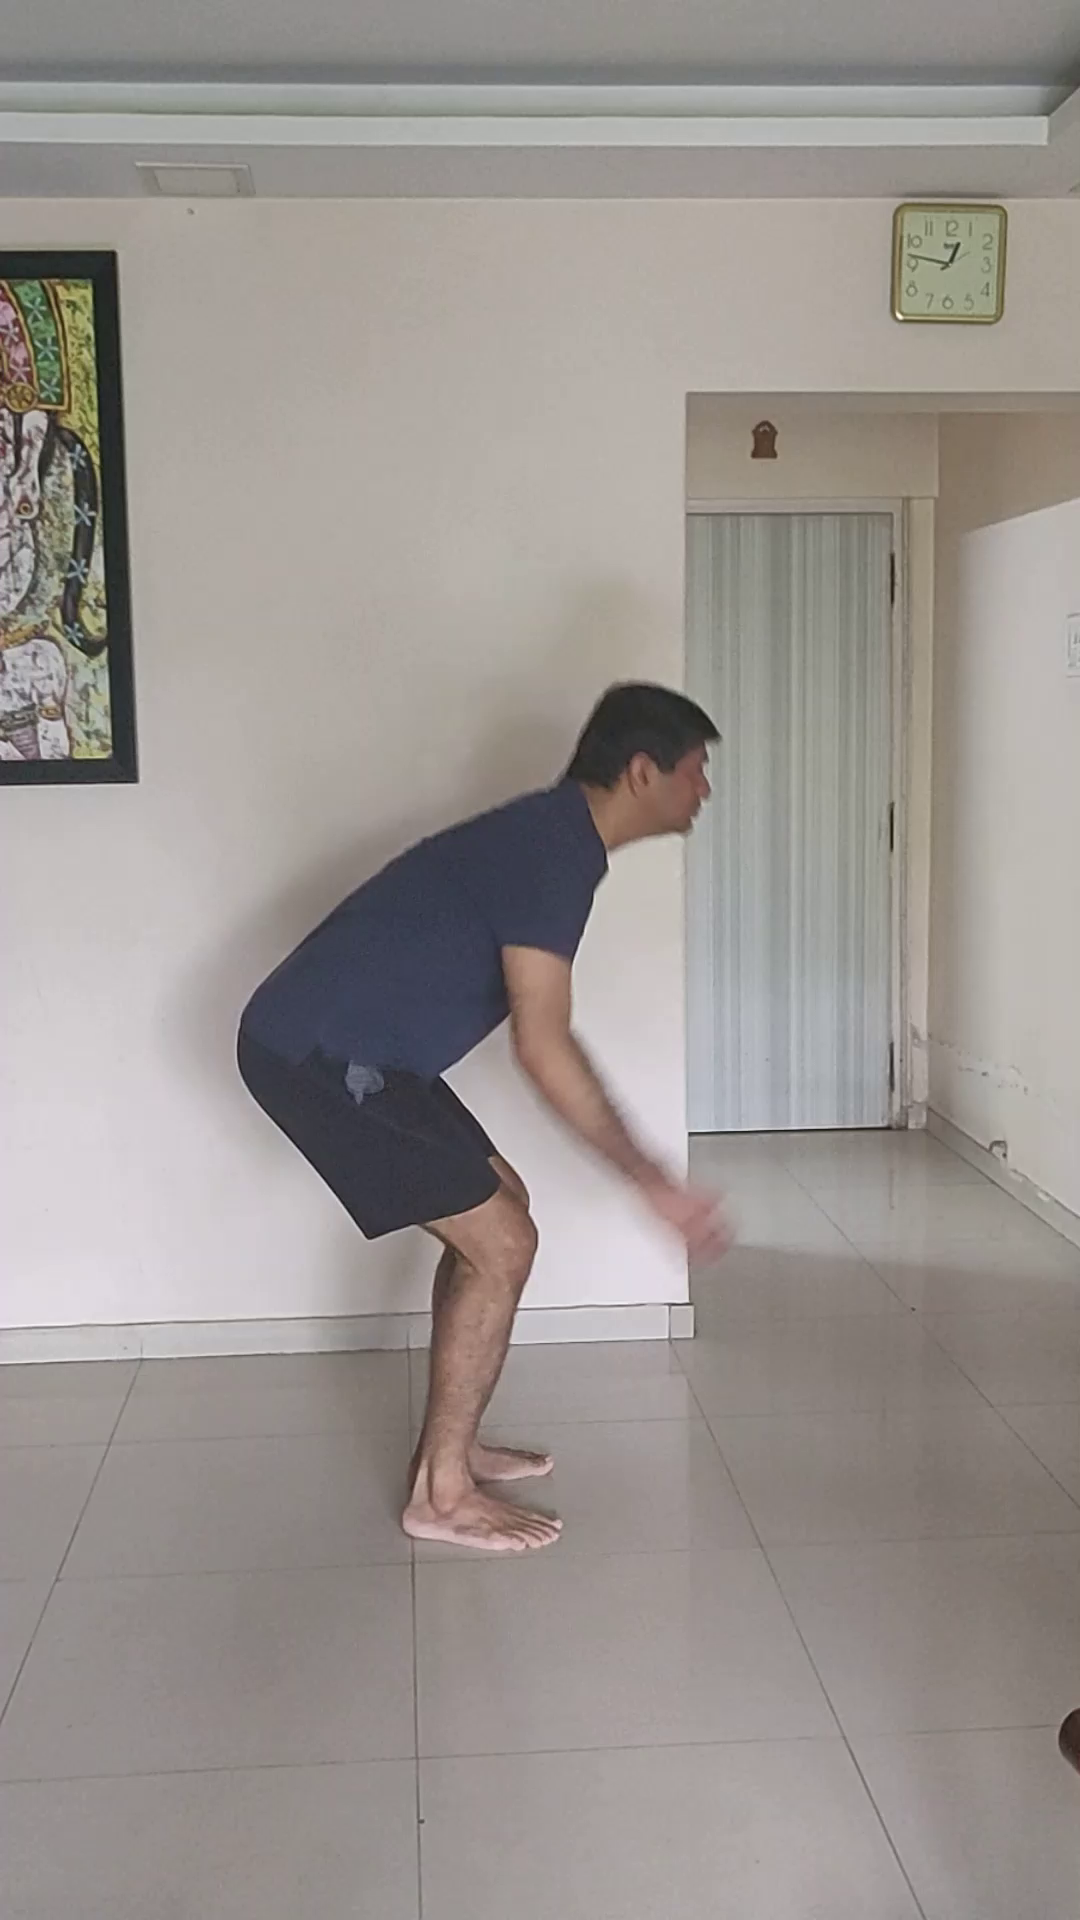

In [13]:
im = load_image(get_image_files(path/"test")[-1])
im

In [14]:
test_dl = learn_inf.dls.test_dl(test_items = get_image_files(path/"test"), 
                                with_labels = True,
                                # get_y = RegexLabeller(pat = r"jump_peak|landing|squat|transition"), 
                                num_workers = 0, 
                                bs = 32
                               )

# When with_labels=True, the labels are picked up by default using get_y=parent_label as set during definition of DataBlock and DataLoaders.
# get_y can't seem to be changed at this stage. So, use this default if images in test folder are arranged like in train folder.
# Otherwise, set with_labels=False and create a labels list separately.

In [15]:
test_preds = learn_inf.get_preds(dl=test_dl)

In [16]:
test_preds

(tensor([[9.9669e-01, 2.9622e-03, 1.0313e-04, 2.4267e-04],
         [9.9593e-01, 3.5118e-03, 1.9772e-04, 3.6124e-04],
         [9.9966e-01, 2.4993e-04, 6.1534e-06, 8.6213e-05],
         [9.9998e-01, 1.9096e-05, 4.8548e-07, 5.2794e-07],
         [9.9968e-01, 2.8720e-04, 7.2887e-06, 2.3327e-05],
         [9.9999e-01, 1.1821e-05, 1.8493e-06, 7.0925e-07],
         [9.9987e-01, 9.8711e-05, 1.1634e-05, 1.9211e-05],
         [9.9999e-01, 5.8918e-06, 1.3473e-06, 6.7277e-07],
         [9.9775e-01, 1.7226e-03, 2.4155e-04, 2.8182e-04],
         [9.9912e-01, 2.8973e-04, 9.9915e-05, 4.8776e-04],
         [9.8644e-01, 3.8486e-03, 1.0402e-03, 8.6711e-03],
         [4.9548e-01, 1.9010e-02, 4.3791e-03, 4.8113e-01],
         [9.9040e-01, 9.1462e-04, 1.4516e-03, 7.2298e-03],
         [9.9616e-01, 1.1232e-03, 1.5441e-03, 1.1755e-03],
         [9.9864e-01, 9.2376e-05, 1.0883e-04, 1.1561e-03],
         [9.9782e-01, 7.2000e-04, 6.8313e-04, 7.7242e-04],
         [9.9852e-01, 2.2470e-04, 1.1141e-04, 1.1440e-03

In [17]:
type(test_preds)

tuple

In [18]:
test_preds[0].shape

torch.Size([198, 4])

In [19]:
test_preds[1].shape

torch.Size([198])

In [20]:
test_preds_df = pd.DataFrame(columns=["Filename", "Actual Category", "Predicted Category", "% prob jump_peak", "% prob landing", "% prob squat", "% prob transition"])

for i in range(test_preds[0].shape[0]):
    
    test_preds_df.loc[i, "Filename"] = os.path.basename(get_image_files(path/"test")[i])
    test_preds_df.loc[i, "Actual Category"] = learn_inf.dls.vocab[test_preds[1][i]]
    test_preds_df.loc[i, "Predicted Category"] = learn_inf.dls.vocab[np.argmax(test_preds[0][i])]
    test_preds_df.loc[i, ["% prob jump_peak", "% prob landing", "% prob squat", "% prob transition"]] = np.round(test_preds[0][i]*100, 2)

In [21]:
test_preds_df

Filename Actual Category  \
0                20200918_161843_FRAME_70_jump_peak.png       jump_peak   
1                20200918_161843_FRAME_74_jump_peak.png       jump_peak   
2                     IMG_3510_FRAME_1260_jump_peak.png       jump_peak   
3                     IMG_3510_FRAME_1354_jump_peak.png       jump_peak   
4                      IMG_3510_FRAME_253_jump_peak.png       jump_peak   
..                                                  ...             ...   
193  VID_20201023_152447_PC new_FRAME_37_transition.png      transition   
194  VID_20201023_152447_PC new_FRAME_78_transition.png      transition   
195   VID_20201023_152447_PC new_FRAME_7_transition.png      transition   
196   VID_20201023_152447_PC new_FRAME_8_transition.png      transition   
197                     VID_GC 2_FRAME_1_transition.png      transition   

    Predicted Category % prob jump_peak % prob landing % prob squat  \
0            jump_peak            99.67            0.3         0.01   
1            jump_peak            99.59           0.35         0.02   
2            jump_peak            99.97           0.02            0   
3            jump_peak              100              0            0   
4            jump_peak            99.97           0.03            0   
..                 ...              ...            ...          ...   
193         transition             0.01           0.45         0.04   
194         transition             0.13           0.44        14.36   
195         transition             0.05            2.6         0.03   
196         transition             0.05           1.68         0.03   
197         transition             0.06           0.86         1.91   

    % prob transition  
0                0.02  
1                0.04  
2                0.01  
3                   0  
4                   0  
..                ...  
193             99.51  
194             85.07  
195             97.32  
196             98.24  
197             97.16  

[198 rows x 7 columns]

In [22]:
os.makedirs("../inputs_outputs/test_preds_csv", exist_ok=True)
test_preds_df.to_csv(os.path.join("../inputs_outputs/test_preds_csv", "test_preds_"+os.path.splitext(os.path.basename(model_pkl_path))[0]+".csv"), index=False)

## Predictions on Unseen Videos (in *test_real_unseen* folder)

In [23]:
import fastai
print('fastai : version {}'.format(fastai.__version__))

fastai : version 2.0.16


In [24]:
from fastai.vision.all import *
import re

In [25]:
path = Path("../inputs_outputs/datasets_train_test/vjump_dataset")
path.ls()

(#3) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/test'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/test_real_unseen'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train')]

In [26]:
folder_paths_list = [path_item for path_item in (path/"test_real_unseen").ls() if os.path.splitext(path_item)[1]=='']
folder_paths_list

[Path('../inputs_outputs/datasets_train_test/vjump_dataset/test_real_unseen/VID_20201024_200813')]

In [27]:
for vid_folder in folder_paths_list:
    print(len(get_image_files(vid_folder)))

258


In [28]:
verify_images(get_image_files(path/"test_real_unseen"))

(#0) []

In [29]:
# Run this to remove any files in the dataset that fail verification (ie. they're not images).

# failed = verify_images(get_image_files(path/"train"))
# failed.map((path/"train").unlink)

In [30]:
model_pkl_path = "C:/Users/S121741/Documents/Personal/Personal Projects_DATA/1. Fitness AI/w_yrs_poc1/inputs_outputs/models/resnet34__v3.0.pkl"
learn_inf = load_learner(model_pkl_path)

In [31]:
learn_inf.dls.vocab

['jump_peak', 'landing', 'squat', 'transition']

In [32]:
learn_inf.predict(get_image_files(path/"test_real_unseen")[0])

('squat', tensor(2), tensor([5.4294e-03, 5.6152e-04, 9.8862e-01, 5.3879e-03]))

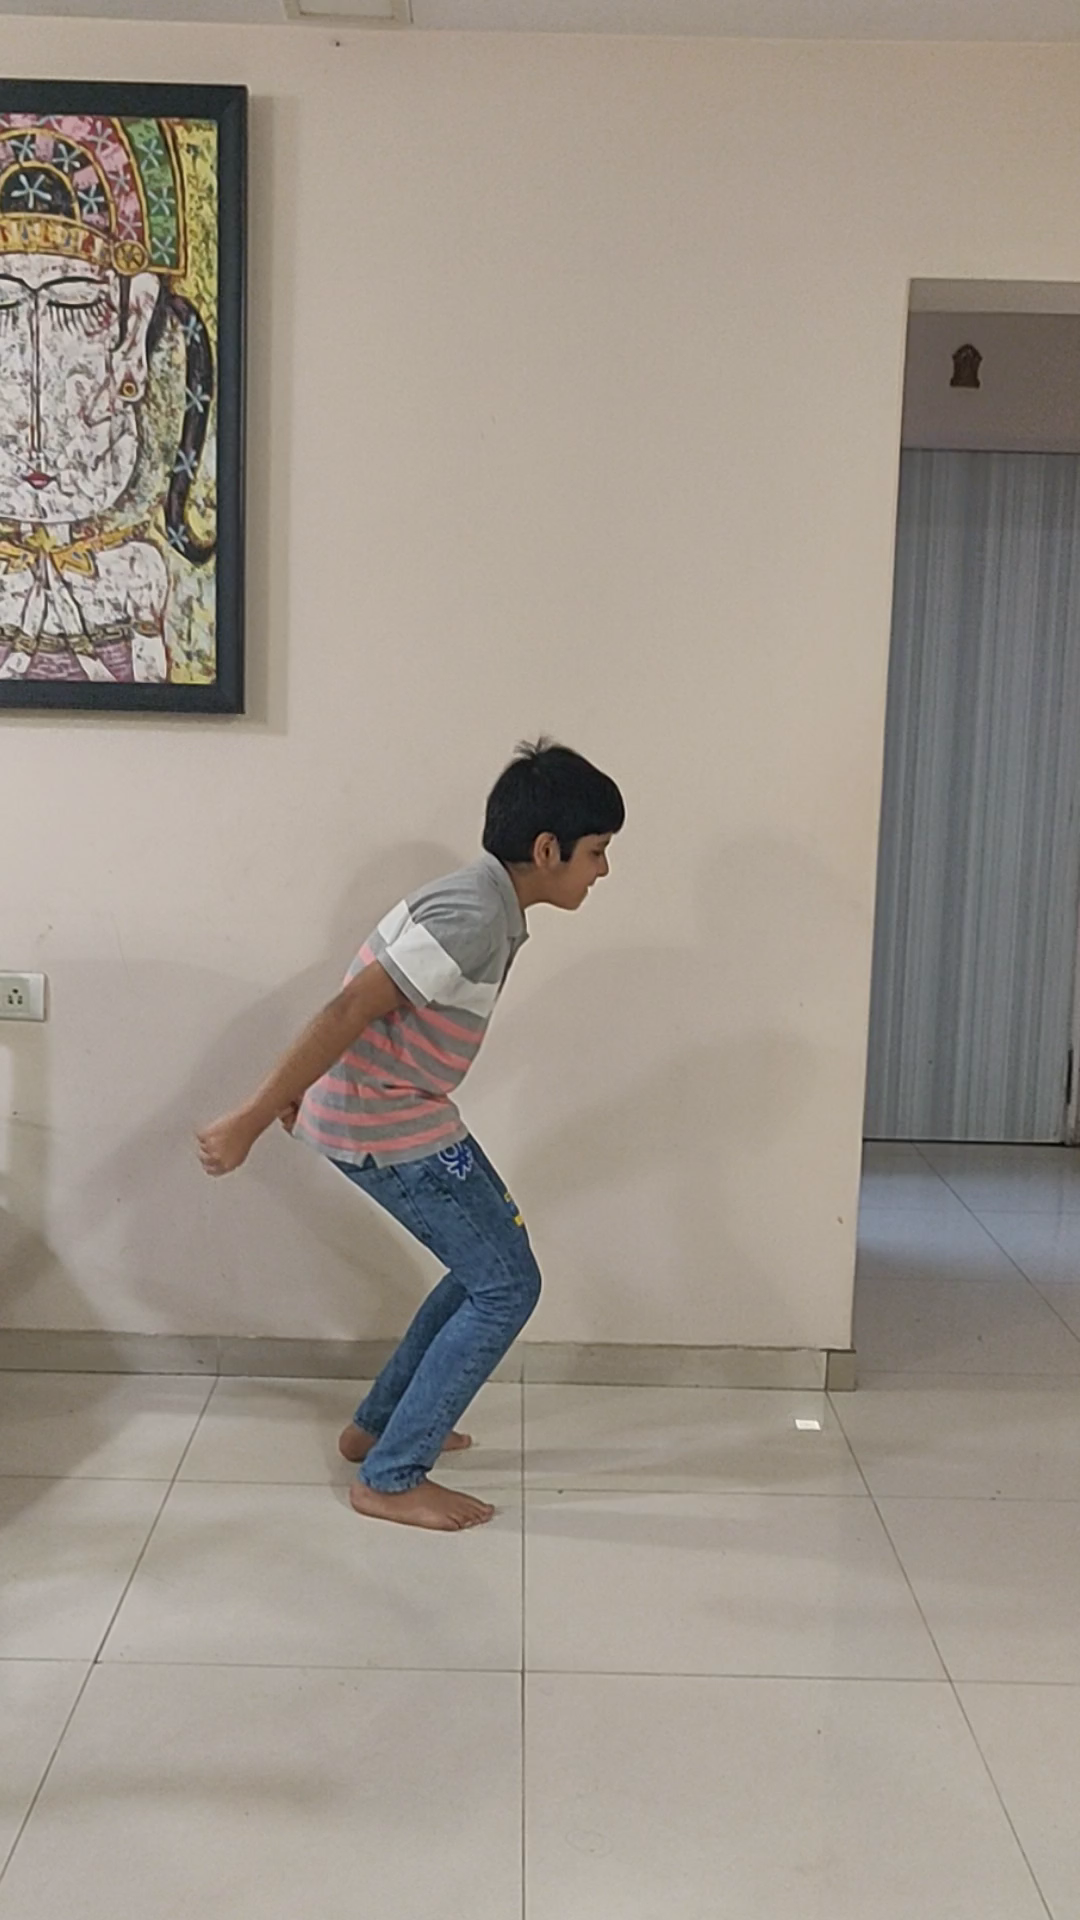

In [33]:
im = load_image(get_image_files(path/"test_real_unseen")[0])
im

In [34]:
learn_inf.predict(get_image_files(path/"test_real_unseen")[-1])

('transition', tensor(3), tensor([0.0048, 0.4322, 0.0078, 0.5552]))

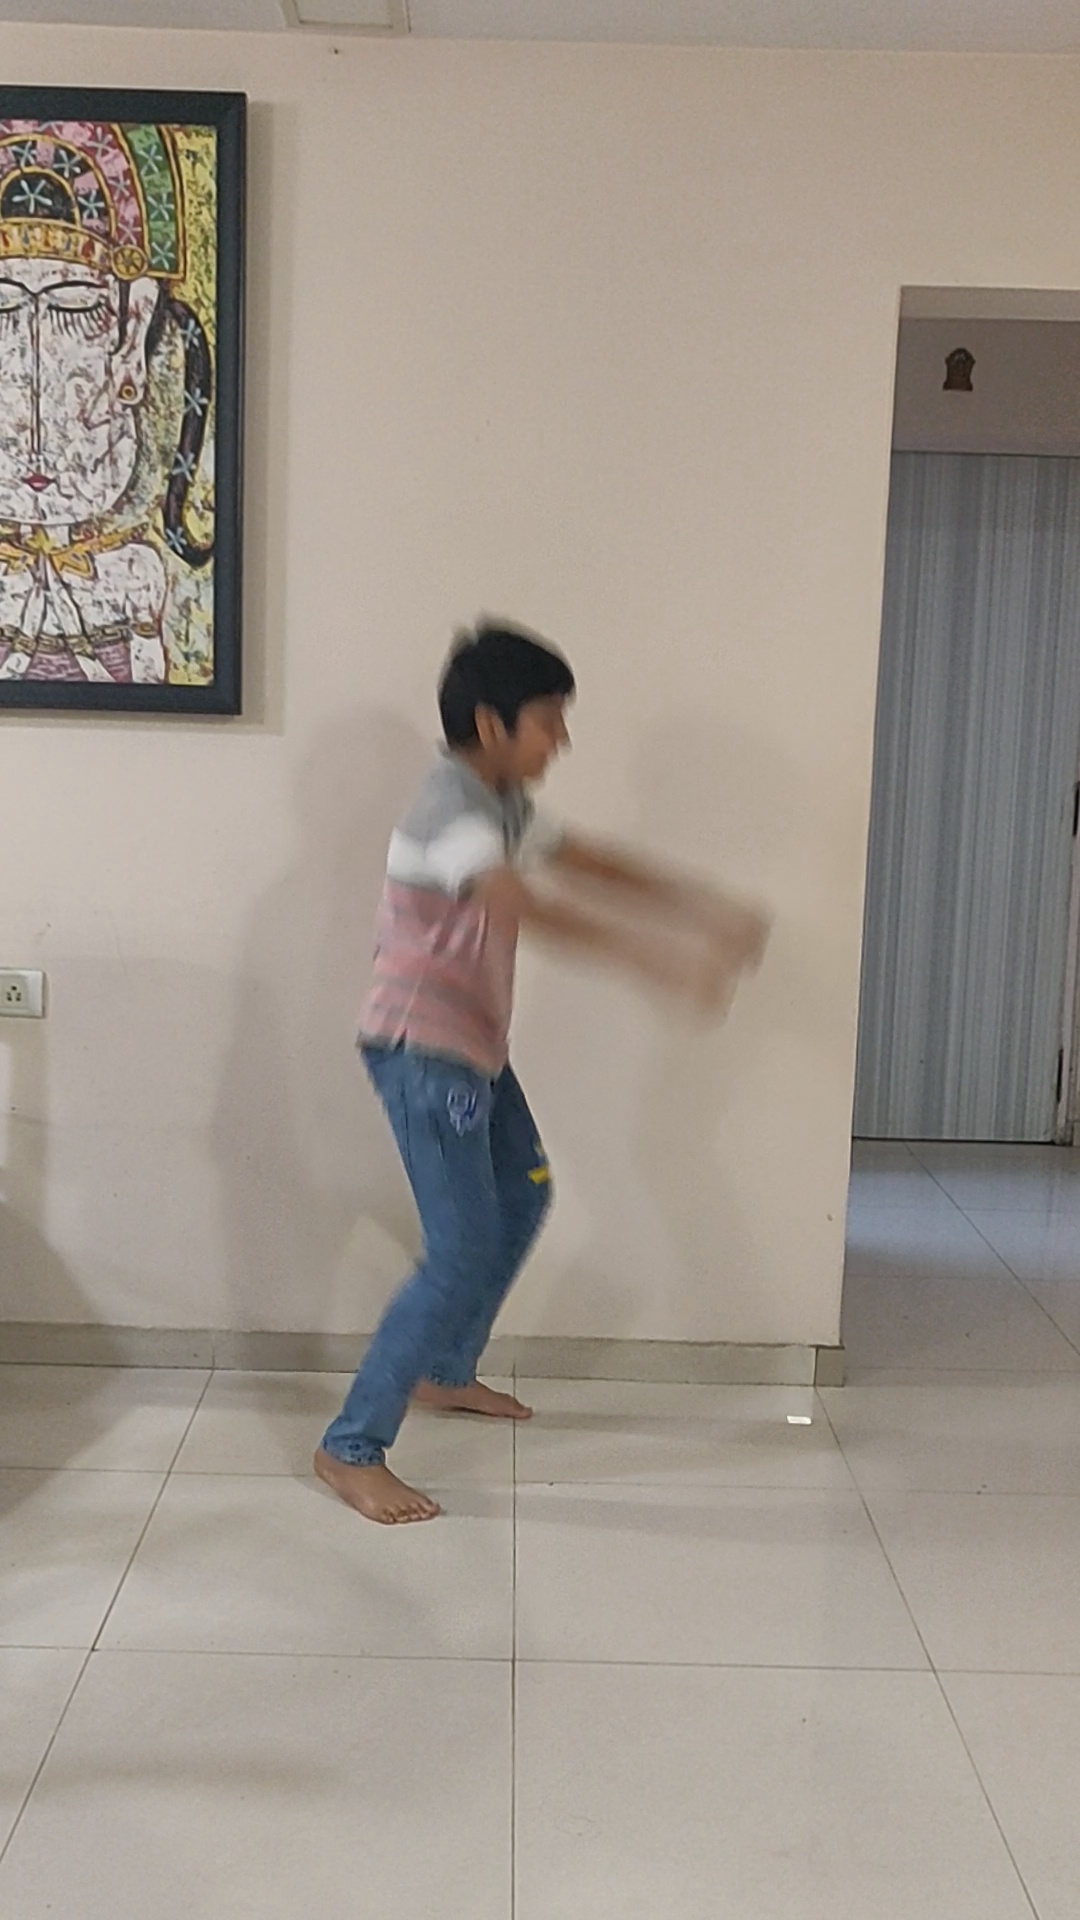

In [35]:
im = load_image(get_image_files(path/"test_real_unseen")[-1])
im

In [36]:
for vid_folder in folder_paths_list:
    
    frames_csv = vid_folder.name + "_FRAME_LABELS.csv"
    frames_csv_path = os.path.join(vid_folder, frames_csv)
    frames_df = pd.read_csv(frames_csv_path)
    
    frames_df_is_valid = True
    # CHECK frames_df VALIDITY HERE
    frames_df.dropna(axis=0, inplace=True)
    frames_df = frames_df.astype("int64")
    
    if frames_df_is_valid:
        
        test_preds_list = [None]*len(frames_df)
        
        for index, row in frames_df.iterrows():
            
            test_preds_list[index] = {}
            
            if row["squat"] == 1:
                test_preds_list[index]["Actual Category"] = "squat"
            elif row["jump_peak"] == 1:
                test_preds_list[index]["Actual Category"] = "jump_peak"
            elif row["landing"] == 1:
                test_preds_list[index]["Actual Category"] = "landing"
            # else:
            elif (row["squat"] == 0 and row["jump_peak"] == 0 and row["landing"] == 0):
                test_preds_list[index]["Actual Category"] = "transition"
                
        test_dl = learn_inf.dls.test_dl(test_items = get_image_files(vid_folder), 
                                with_labels = False,
                                # get_y = RegexLabeller(pat = r"jump_peak|landing|squat|transition"), 
                                num_workers = 0, 
                                bs = 32
                               )
        # When with_labels=True, the labels are picked up by default using get_y=parent_label as set during definition of DataBlock and DataLoaders.
        # get_y can't seem to be changed at this stage. So, use this default if images in test folder are arranged like in train folder.
        # Otherwise, set with_labels=False and create a labels list separately.
        
        test_preds = learn_inf.get_preds(dl=test_dl)
    
        for i in range(test_preds[0].shape[0]):
            
            frame = int(re.findall(r"FRAME_(\d*)", get_image_files(vid_folder)[i].name)[0])
            
            test_preds_list[frame - 1]["Filename"] = get_image_files(vid_folder)[i].name
            test_preds_list[frame - 1]["Predicted Category"] = learn_inf.dls.vocab[np.argmax(test_preds[0][i])]
            
            for prob in test_preds[0][i]:
                test_preds_list[frame - 1]["% prob jump_peak"] = np.round(test_preds[0][i][0].item() * 100, 2)
                test_preds_list[frame - 1]["% prob landing"] = np.round(test_preds[0][i][1].item() * 100, 2)
                test_preds_list[frame - 1]["% prob squat"] = np.round(test_preds[0][i][2].item() * 100, 2)
                test_preds_list[frame - 1]["% prob transition"] = np.round(test_preds[0][i][3].item() * 100, 2)
            
        test_preds_df = pd.DataFrame.from_records(test_preds_list)
        
        test_preds_df = test_preds_df[["Filename", "Actual Category", "Predicted Category", "% prob jump_peak", "% prob landing", "% prob squat", "% prob transition"]]
    
        test_preds_df.to_csv(os.path.join(vid_folder, "test_preds_"+os.path.splitext(os.path.basename(model_pkl_path))[0]+".csv"), index=False)
        
    else:
        pass